In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -qq "/content/drive/MyDrive/deeplearning_file/test_recyclable_materials.zip"

In [3]:
import os
import glob

# path = './recyclable_materials/'
# os.listdir(path)
#colab 경로

path = '/content/drive/MyDrive/deeplearning_file/test_recyclable_materials'
os.listdir(path)
#local 경로
# paper_path = './recyclable_materials/paper'
# can_path = './recyclable_materials/can'
# plastic_bag_path = './recyclable_materials/plastic_bag'
# glass_path = './recyclable_materials/glass'
# styrofoam_path = './recyclable_materials/styrofoam'
# plastic_path = './recyclable_materials/plastic'
# path = './recyclable_materials/'

# os.listdir(paper_path)
# os.listdir(can_path)
# os.listdir(plastic_bag_path)
# os.listdir(glass_path)
# os.listdir(styrofoam_path)
# os.listdir(plastic_path)

['glass_IMG_8612.jpeg',
 'glass_IMG_8610.jpeg',
 'glass_IMG_8607.jpeg',
 'glass_IMG_8887.jpeg',
 'glass_IMG_8599.jpeg',
 'glass_IMG_8622.jpeg',
 'glass_IMG_8629.jpeg',
 'glass_IMG_8720.jpeg',
 'glass_IMG_8614.jpeg',
 'glass_IMG_8623.jpeg',
 'glass_IMG_8637.jpeg',
 'glass_IMG_8888.jpeg',
 'glass_IMG_8595.jpeg',
 'glass_IMG_8644.jpeg',
 'glass_IMG_8613.jpeg',
 'glass_IMG_8634.jpeg',
 'glass_IMG_8619.jpeg',
 'glass_IMG_8633.jpeg',
 'glass_IMG_8643.jpeg',
 'glass_IMG_8602.jpeg',
 'glass_IMG_8594.jpeg',
 'glass_IMG_8598.jpeg',
 'glass_IMG_8621.jpeg',
 'glass_IMG_8617.jpeg',
 'glass_IMG_8886.jpeg',
 'glass_IMG_8596.jpeg',
 'glass_IMG_8615.jpeg',
 'glass_IMG_8631.jpeg',
 'glass_IMG_8606.jpeg',
 'glass_IMG_8625.jpeg',
 'glass_IMG_8608.jpeg',
 'glass_IMG_8603.jpeg',
 'glass_IMG_8635.jpeg',
 'glass_IMG_8636.jpeg',
 'glass_IMG_8604.jpeg',
 'glass_IMG_8628.jpeg',
 'glass_IMG_8627.jpeg',
 'glass_IMG_8640.jpeg',
 'glass_IMG_8609.jpeg',
 'glass_IMG_8859.jpeg',
 'glass_IMG_8597.jpeg',
 'glass_IMG_8600

In [7]:
names = os.listdir(path)
labels = [each.split('_')[0]for each in names]
file_id = [each.split('_')[2]for each in names]

In [8]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

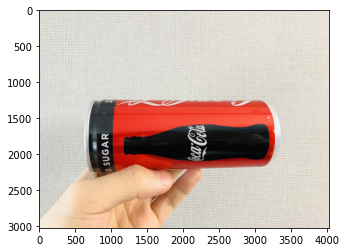

In [9]:
sample = random.choice(names)
image = mpimg.imread(path +"/"+ sample)
plt.imshow(image)
plt.show()

In [10]:
sample = random.choice(names)
image = mpimg.imread(path+ "/" + sample)
image.shape

(4032, 3024, 3)

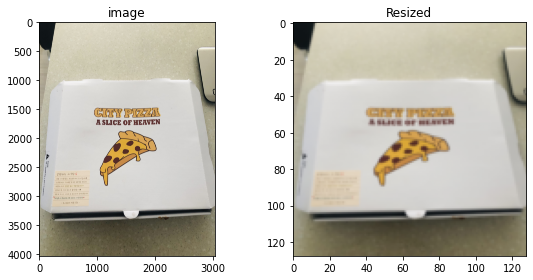

In [11]:
from skimage.transform import resize
resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('image')
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title('Resized')

fig.tight_layout()
plt.show()


In [12]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

In [13]:
images = []
bar_total = tqdm(names)
for file in bar_total:
    image = mpimg.imread(path +"/"+ file)
    images.append(resize(image, (128, 128, 3)))
    
images = np.array(images)

In [14]:
images.shape, labels[:3]

((242, 128, 128, 3), ['glass', 'glass', 'glass'])

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 1, 1]),
 array(['can', 'glass', 'paper', 'plastic', 'plasticbag', 'styrofoam'],
       dtype='<U10'))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
            train_test_split(images, labels_encoded, test_size=0.2,
                            random_state=13, stratify=labels_encoded)
X_train.shape, X_test.shape

((193, 128, 128, 3), (49, 128, 128, 3))

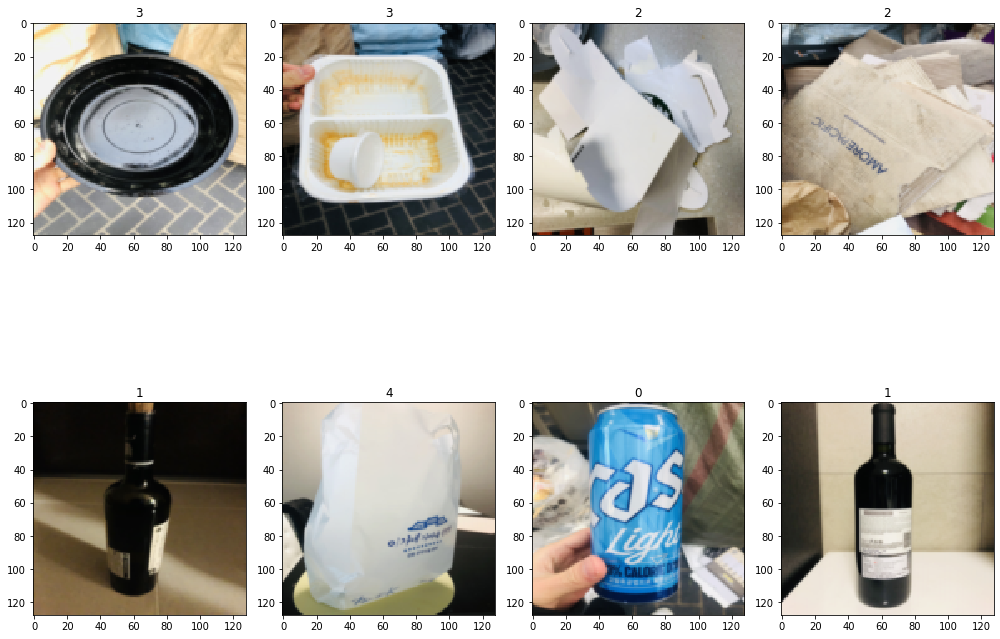

In [18]:
samples = random.choices(population=range(0, 193), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
  plt.subplot(2, 4, idx+1)
  plt.imshow(X_train[n], cmap='Greys',
             interpolation='nearest')
  plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 64)       

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
import time
start_time = time.time()
hist = model.fit(X_train.reshape(193, 128, 128, 3), y_train,
                 epochs=20, verbose=1,
                 validation_data = (X_test.reshape(49, 128, 128, 3), y_test))
print("fit time :", time.time() - start_time)

Epoch 1/20
7/7 [==============================] - 1s 88ms/step - loss: nan - accuracy: 0.1140 - val_loss: nan - val_accuracy: 0.1020
Epoch 2/20
7/7 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.1088 - val_loss: nan - val_accuracy: 0.1020
Epoch 3/20
7/7 [==============================] - 0s 41ms/step - loss: nan - accuracy: 0.1088 - val_loss: nan - val_accuracy: 0.1020
Epoch 4/20
7/7 [==============================] - 0s 40ms/step - loss: nan - accuracy: 0.1088 - val_loss: nan - val_accuracy: 0.1020
Epoch 5/20
7/7 [==============================] - 0s 43ms/step - loss: nan - accuracy: 0.1088 - val_loss: nan - val_accuracy: 0.1020
Epoch 6/20
7/7 [==============================] - 0s 40ms/step - loss: nan - accuracy: 0.1088 - val_loss: nan - val_accuracy: 0.1020
Epoch 7/20
7/7 [==============================] - 0s 46ms/step - loss: nan - accuracy: 0.1088 - val_loss: nan - val_accuracy: 0.1020
Epoch 8/20
7/7 [==============================] - 0s 68ms/step - loss

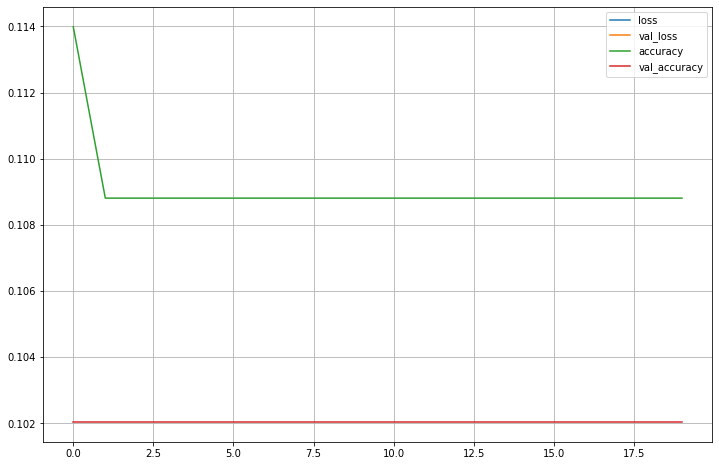

In [28]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()